In [47]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cufflinks as cf
cf.go_offline()

In [48]:
df_dc = pd.read_csv('marvel-wikia-data.csv')

In [49]:
df_dc.head(5)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [50]:
df_dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 13 columns):
page_id             16376 non-null int64
name                16376 non-null object
urlslug             16376 non-null object
ID                  12606 non-null object
ALIGN               13564 non-null object
EYE                 6609 non-null object
HAIR                12112 non-null object
SEX                 15522 non-null object
GSM                 90 non-null object
ALIVE               16373 non-null object
APPEARANCES         15280 non-null float64
FIRST APPEARANCE    15561 non-null object
Year                15561 non-null float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.6+ MB


In [51]:
print("Unique IDs: ", df_dc.ID.unique())
print("Unique IDs: ", df_dc.ID.nunique())

Unique IDs:  ['Secret Identity' 'Public Identity' 'No Dual Identity'
 'Known to Authorities Identity' nan]
Unique IDs:  4


In [52]:
# The Column Name urlslug is alomost same as the name column so dropping it.

In [53]:
df_dc = df_dc.drop('urlslug' ,axis = 1)

In [54]:
df_dc.head(5)

,page_id,name,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [55]:
df_dc = df_dc.drop('page_id', axis = 1)

In [56]:
df_dc.head()

,name,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,Captain America (Steven Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,Thor (Thor Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [57]:
# Converting the First Appearance to Time Stamp

In [58]:
print(df_dc['ALIVE'].unique())

['Living Characters' 'Deceased Characters' nan]


In [59]:
df_dc.isnull().sum()

name                    0
ID                   3770
ALIGN                2812
EYE                  9767
HAIR                 4264
SEX                   854
GSM                 16286
ALIVE                   3
APPEARANCES          1096
FIRST APPEARANCE      815
Year                  815
dtype: int64

In [60]:
df_dc = df_dc.set_index(['ID'])

In [61]:
df_dc.head()

,name,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
ID,,,,,,,,,,
Secret Identity,Spider-Man (Peter Parker),Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
Public Identity,Captain America (Steven Rogers),Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
Public Identity,"Wolverine (James \""Logan\"" Howlett)",Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
Public Identity,"Iron Man (Anthony \""Tony\"" Stark)",Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
No Dual Identity,Thor (Thor Odinson),Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [62]:
#Feature Engineering

In [63]:
#Find Total Null Values

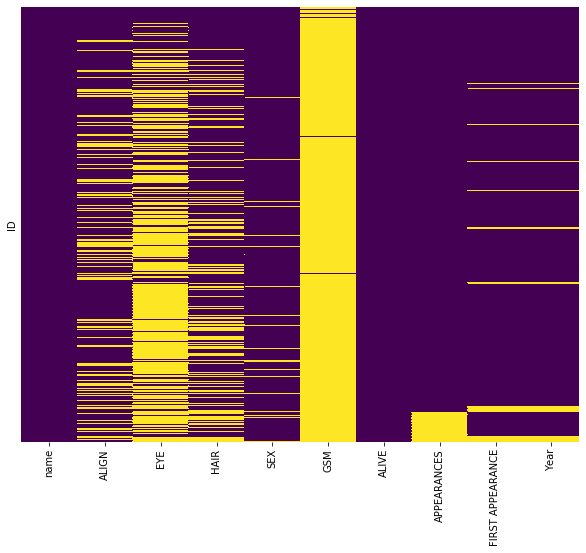

In [64]:
plt.figure(figsize = (10,8))
sns.heatmap(df_dc.isnull(), cbar = False, yticklabels=False, cmap = 'viridis')

# THE GSM Column is almost empty so it is better to remove it from the DataSet

In [65]:
df_dc = df_dc.drop('GSM', axis = 1)

In [66]:
df_dc.head()

,name,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
ID,,,,,,,,,
Secret Identity,Spider-Man (Peter Parker),Good Characters,Hazel Eyes,Brown Hair,Male Characters,Living Characters,4043.0,Aug-62,1962.0
Public Identity,Captain America (Steven Rogers),Good Characters,Blue Eyes,White Hair,Male Characters,Living Characters,3360.0,Mar-41,1941.0
Public Identity,"Wolverine (James \""Logan\"" Howlett)",Neutral Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,3061.0,Oct-74,1974.0
Public Identity,"Iron Man (Anthony \""Tony\"" Stark)",Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,2961.0,Mar-63,1963.0
No Dual Identity,Thor (Thor Odinson),Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,2258.0,Nov-50,1950.0


In [67]:
#Converting the Year to int64 format.

In [68]:
#Filling the YEAR VALUES using imputation methods

In [69]:
df_dc['Year'].fillna(method = 'ffill', inplace = True)

In [70]:
df_dc['Year'] = df_dc['Year'].astype('int64')

In [71]:
df_dc.head()

,name,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
ID,,,,,,,,,
Secret Identity,Spider-Man (Peter Parker),Good Characters,Hazel Eyes,Brown Hair,Male Characters,Living Characters,4043.0,Aug-62,1962
Public Identity,Captain America (Steven Rogers),Good Characters,Blue Eyes,White Hair,Male Characters,Living Characters,3360.0,Mar-41,1941
Public Identity,"Wolverine (James \""Logan\"" Howlett)",Neutral Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,3061.0,Oct-74,1974
Public Identity,"Iron Man (Anthony \""Tony\"" Stark)",Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,2961.0,Mar-63,1963
No Dual Identity,Thor (Thor Odinson),Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,2258.0,Nov-50,1950


In [72]:
df_dc['APPEARANCES'] = df_dc['APPEARANCES'].fillna(method = 'ffill')

In [73]:
df_dc['APPEARANCES'] = df_dc['APPEARANCES'].astype('int64')

In [74]:
df_dc.head(20)

,name,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
ID,,,,,,,,,
Secret Identity,Spider-Man (Peter Parker),Good Characters,Hazel Eyes,Brown Hair,Male Characters,Living Characters,4043,Aug-62,1962
Public Identity,Captain America (Steven Rogers),Good Characters,Blue Eyes,White Hair,Male Characters,Living Characters,3360,Mar-41,1941
Public Identity,"Wolverine (James \""Logan\"" Howlett)",Neutral Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,3061,Oct-74,1974
Public Identity,"Iron Man (Anthony \""Tony\"" Stark)",Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,2961,Mar-63,1963
No Dual Identity,Thor (Thor Odinson),Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,2258,Nov-50,1950
Public Identity,Benjamin Grimm (Earth-616),Good Characters,Blue Eyes,No Hair,Male Characters,Living Characters,2255,Nov-61,1961
Public Identity,Reed Richards (Earth-616),Good Characters,Brown Eyes,Brown Hair,Male Characters,Living Characters,2072,Nov-61,1961
Public Identity,Hulk (Robert Bruce Banner),Good Characters,Brown Eyes,Brown Hair,Male Characters,Living Characters,2017,May-62,1962
Public Identity,Scott Summers (Earth-616),Neutral Characters,Brown Eyes,Brown Hair,Male Characters,Living Characters,1955,Sep-63,1963


## Visualizing the Number of Secret Identity and Public Identity

In [75]:
df_dc.index.value_counts()

Secret Identity                  6275
Public Identity                  4528
No Dual Identity                 1788
Known to Authorities Identity      15
Name: ID, dtype: int64

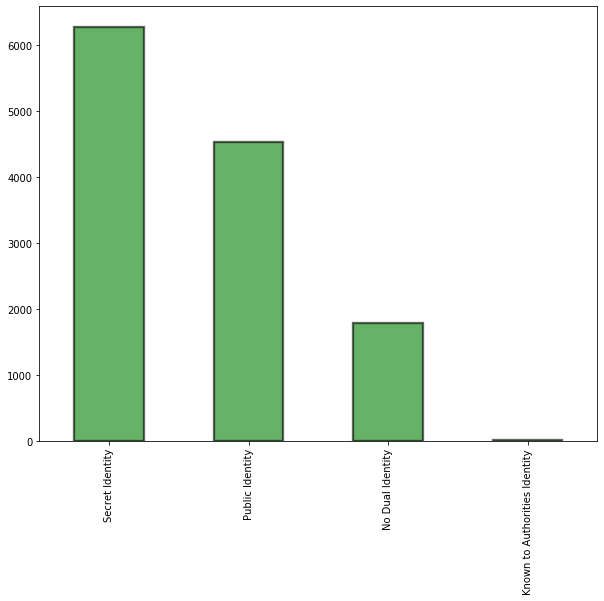

In [76]:
plt.figure(figsize = (10,8))
df_dc.index.value_counts().plot.bar(color = 'green', alpha = 0.6, linewidth = 2.3, edgecolor = 'black')

## Visualizing the Number of Unique Characters

In [77]:
df_dc['ALIGN'].value_counts()

Bad Characters        6720
Good Characters       4636
Neutral Characters    2208
Name: ALIGN, dtype: int64

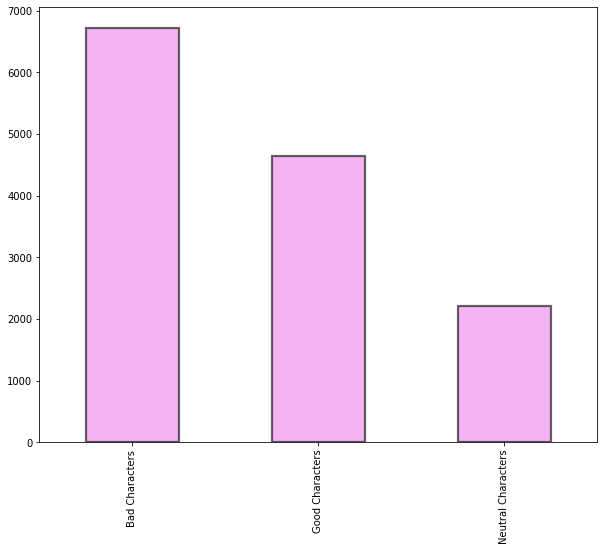

In [78]:
plt.figure(figsize = (10,8))
df_dc['ALIGN'].value_counts().plot.bar(color = 'violet', alpha = 0.6, linewidth = 2.2, edgecolor = 'black')

In [79]:
df_dc.columns

Index(['name', 'ALIGN', 'EYE', 'HAIR', 'SEX', 'ALIVE', 'APPEARANCES',
       'FIRST APPEARANCE', 'Year'],
      dtype='object')

In [80]:
df_dc.columns = ['Names', 'ALIGN', 'EYE', 'HAIR', 'SEX', 'ALIVE', 'APPEARANCES',
       'FIRST_APPEARANCE', 'YEAR']

In [81]:
df_dc.head()

,Names,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,FIRST_APPEARANCE,YEAR
ID,,,,,,,,,
Secret Identity,Spider-Man (Peter Parker),Good Characters,Hazel Eyes,Brown Hair,Male Characters,Living Characters,4043,Aug-62,1962
Public Identity,Captain America (Steven Rogers),Good Characters,Blue Eyes,White Hair,Male Characters,Living Characters,3360,Mar-41,1941
Public Identity,"Wolverine (James \""Logan\"" Howlett)",Neutral Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,3061,Oct-74,1974
Public Identity,"Iron Man (Anthony \""Tony\"" Stark)",Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,2961,Mar-63,1963
No Dual Identity,Thor (Thor Odinson),Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,2258,Nov-50,1950


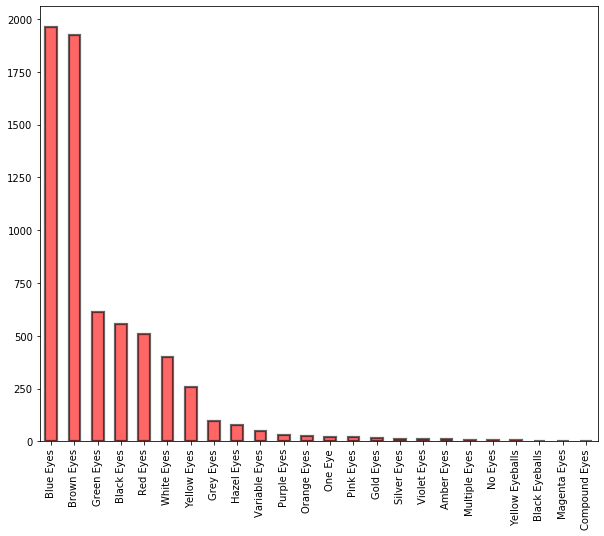

In [82]:
plt.figure(figsize = (10,8))
df_dc['EYE'].value_counts().plot.bar(color = 'red', alpha = 0.6, linewidth = 2.2, edgecolor = 'black')

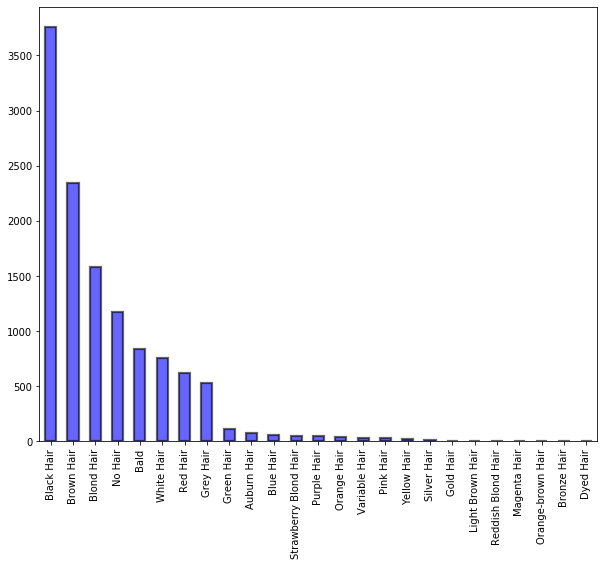

In [83]:
plt.figure(figsize = (10,8))
df_dc['HAIR'].value_counts().plot.bar(color = 'blue', alpha = 0.6, linewidth = 2.2, edgecolor = 'black')

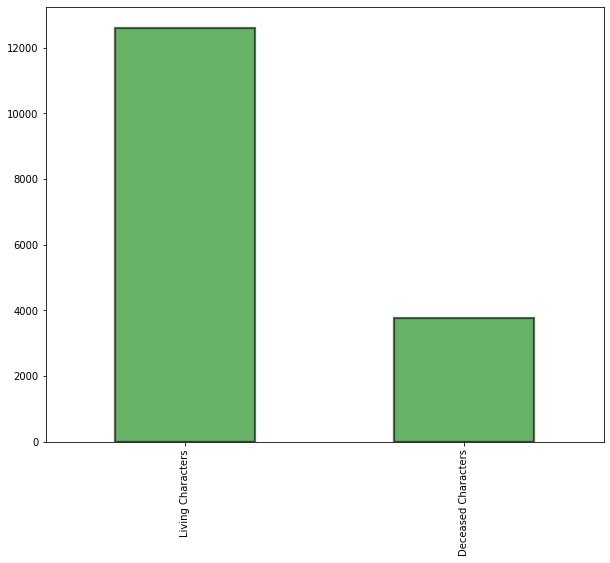

In [84]:
plt.figure(figsize = (10,8))
df_dc['ALIVE'].value_counts().plot.bar(color = 'green', alpha = 0.6, linewidth = 2.2, edgecolor = 'black')

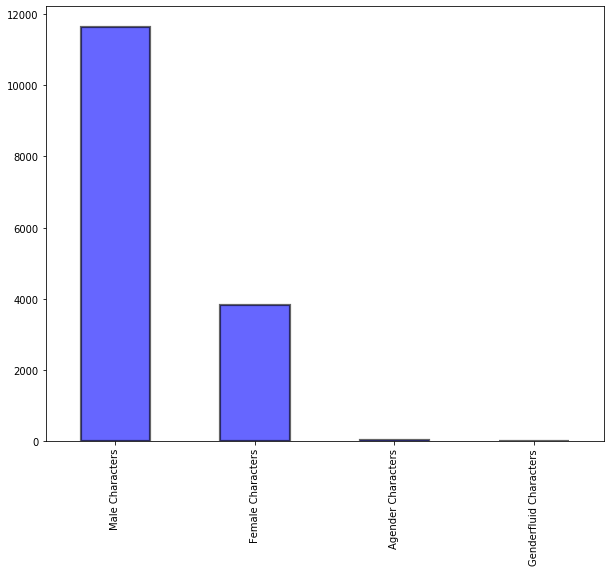

In [85]:
plt.figure(figsize = (10,8))
df_dc['SEX'].value_counts().plot.bar(color = 'blue', alpha = 0.6, linewidth = 2.2, edgecolor = 'black')

In [86]:
df_dc.head()

,Names,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,FIRST_APPEARANCE,YEAR
ID,,,,,,,,,
Secret Identity,Spider-Man (Peter Parker),Good Characters,Hazel Eyes,Brown Hair,Male Characters,Living Characters,4043,Aug-62,1962
Public Identity,Captain America (Steven Rogers),Good Characters,Blue Eyes,White Hair,Male Characters,Living Characters,3360,Mar-41,1941
Public Identity,"Wolverine (James \""Logan\"" Howlett)",Neutral Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,3061,Oct-74,1974
Public Identity,"Iron Man (Anthony \""Tony\"" Stark)",Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,2961,Mar-63,1963
No Dual Identity,Thor (Thor Odinson),Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,2258,Nov-50,1950


In [87]:
df_dc.reset_index(inplace = True)